Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset

In [3]:
df=pd.read_csv("Avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [4]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


There are 18249 rows and 14 columns Date,region and type are of object type and the remaining 9 features are of float typeand 2 features are of int type

In [7]:
#we will check there are null values present in the data
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are no null values present in the data

<AxesSubplot:>

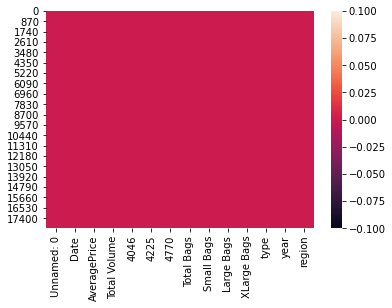

In [8]:
# we can see is there is any missing data present in the dataset
sns.heatmap(df.isnull())

there is no missing data present in the data

Here Unnamed:0 is column present the data set as it is showing only index numbers so we can drop this column

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

we observe that date column is of type object so we change it into date type

In [10]:
type(df['Date'])

pandas.core.series.Series

In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df['Month']=df['Date'].dt.month

In [13]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
dtype: object

In [14]:
#we can seee which type of Avacodos more in demand(Conventional/Organic)
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

conventional type of Avacados have more in demand than organic

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

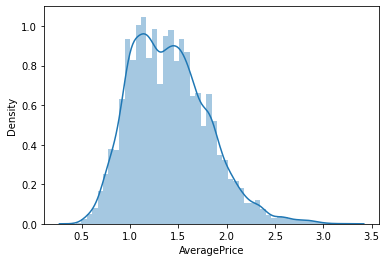

In [15]:
#we can see how AveragePrice is distributed
sns.distplot(df['AveragePrice'])

AveragePrice data is right skewed

In [16]:
df['region'].value_counts()

Charlotte              338
Midsouth               338
Syracuse               338
Tampa                  338
Jacksonville           338
California             338
GreatLakes             338
Pittsburgh             338
MiamiFtLauderdale      338
Boston                 338
Chicago                338
Sacramento             338
Houston                338
HartfordSpringfield    338
LosAngeles             338
NewYork                338
SouthCarolina          338
Denver                 338
TotalUS                338
SouthCentral           338
SanFrancisco           338
LasVegas               338
Plains                 338
DallasFtWorth          338
Columbus               338
CincinnatiDayton       338
RaleighGreensboro      338
HarrisburgScranton     338
BuffaloRochester       338
Detroit                338
SanDiego               338
BaltimoreWashington    338
PhoenixTucson          338
Portland               338
Indianapolis           338
StLouis                338
Seattle                338
O

In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


The describe() function gives the count standard deviation and min,max values and quartiles,There is large value for standard deviation and 75% and max values of XLargeBags 

In [18]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [19]:
#Total Avacado sales increaes year by year

In [20]:
#Averageprice Exploration we have 3 variety of avacado product Look up codes 4046,4225,4770

In [21]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

([<matplotlib.patches.Wedge at 0xfaec028>,
 [Text(0.300862058141864, 1.0580557745084338, 'conventional'),
  Text(-0.30086215720419374, -1.0580557463396905, 'organic')],
 [Text(0.16410657716828944, 0.5771213315500547, '41.18%'),
  Text(-0.1641066312022875, -0.5771213161852856, '58.82%')])

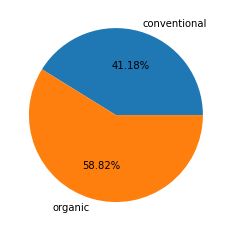

In [22]:
plt.pie(df.groupby('type')['AveragePrice'].mean().values,labels=df.groupby('type')['AveragePrice'].mean().index,autopct='%1.2f%%')

In [23]:
#organic type of avacados have high Averageprice than Conventional

# DataVisualization

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

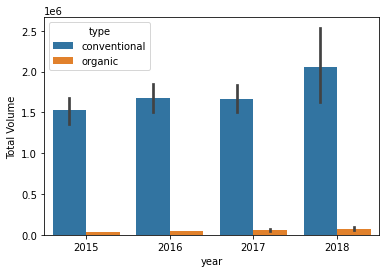

In [24]:
sns.barplot(x='year',y='Total Volume',hue='type',data=df)

In 2018 avacodos of conventional type are sold high having TotalVolume of 0.0 to 2.0 

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

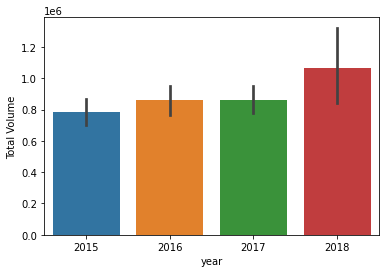

In [25]:
sns.barplot(x='year',y='Total Volume',data=df)

In [26]:
#Which type of avacodos are sold in whichc area
df.groupby(['region','type'])['AveragePrice'].mean().head(60)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
BuffaloRochester     conventional    1.382308
                     organic         1.651361
California           conventional    1.105444
                     organic         1.685207
Charlotte            conventional    1.275089
                     organic         1.936982
Chicago              conventional    1.369349
                     organic         1.744201
CincinnatiDayton     conventional    1.015503
                     organic         1.402899
Columbus             conventional    1.066272


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

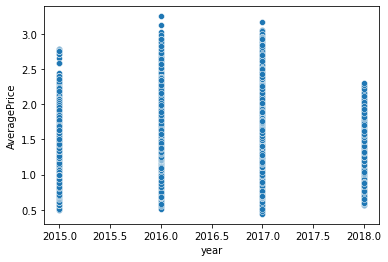

In [27]:
#findout the Averageprice by year
sns.scatterplot(x='year',y='AveragePrice',data=df)

In the year 2016 the AveragePrice is high

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

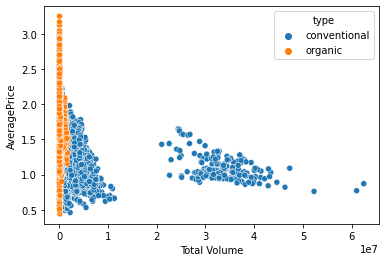

In [28]:
sns.scatterplot(x='Total Volume',y='AveragePrice',hue='type',data=df)

AveragePrice is high for organic avacado

<BarContainer object of 3 artists>

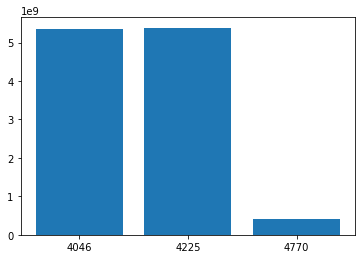

In [29]:
#plotting avacodo categeory wise
plt.bar(['4046','4225','4770'],[df['4046'].sum(),df['4225'].sum(),df['4770'].sum()])

In [30]:
df['4046'].sum()

5347110739.26

In [31]:
df['4225'].sum()

5386275717.93

In [32]:
df['4770'].sum()

416802342.12999994

categeory 4225 type of avacado's sold more than 4046 and less sold type is 4770

In [33]:
#how much avacado sell per year
df.groupby('year')['type'].value_counts()


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

both type of Avacados sold almost same for every year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

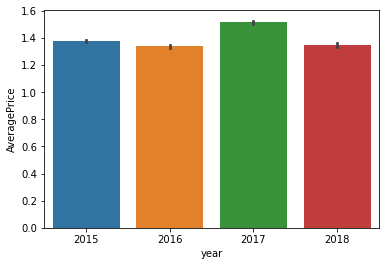

In [34]:
sns.barplot(x='year',y='AveragePrice',data=df)

#In the year 2017 averageprice is more

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

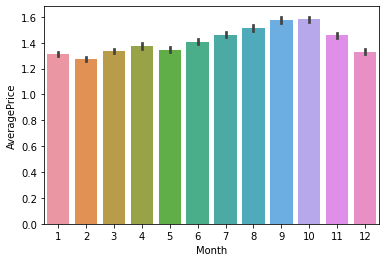

In [35]:
sns.barplot(x='Month',y='AveragePrice',data=df)

In the month of Aug,Sep,Oct avacodo prices are increased

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

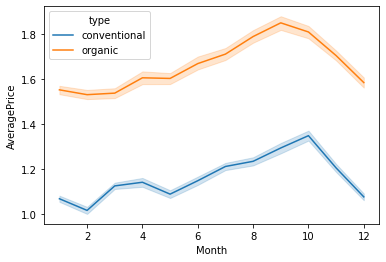

In [36]:
sns.lineplot(x='Month',y='AveragePrice',hue='type',data=df)

Average price is high for both conventional and organic in the month of Aug,Sep,Oct

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

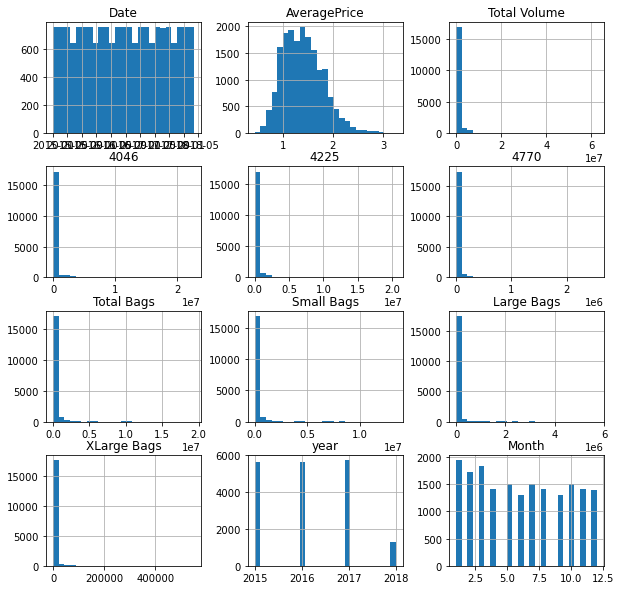

In [37]:
df.hist(figsize=(10,10),bins=25)

'AveragePrice' is normally distributed and all the other columns are right skewed

# Correlation

In [38]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


<AxesSubplot:>

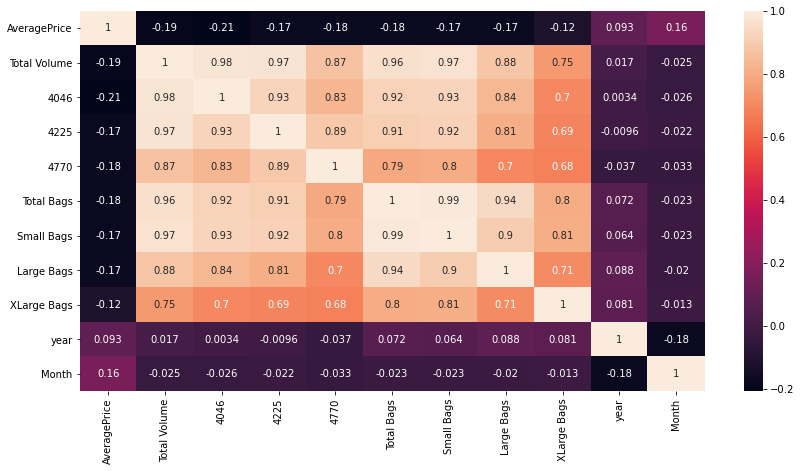

In [39]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)

Target variable AveragePrice is mostly negatively correlated with all the columns except month and year

In [40]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

some of the features are highly skewed with the threshold skewness +/- 0.5

# Outliers checking

AveragePrice       AxesSubplot(0.125,0.125;0.0596154x0.755)
Total Volume    AxesSubplot(0.196538,0.125;0.0596154x0.755)
4046            AxesSubplot(0.268077,0.125;0.0596154x0.755)
4225            AxesSubplot(0.339615,0.125;0.0596154x0.755)
4770            AxesSubplot(0.411154,0.125;0.0596154x0.755)
Total Bags      AxesSubplot(0.482692,0.125;0.0596154x0.755)
Small Bags      AxesSubplot(0.554231,0.125;0.0596154x0.755)
Large Bags      AxesSubplot(0.625769,0.125;0.0596154x0.755)
XLarge Bags     AxesSubplot(0.697308,0.125;0.0596154x0.755)
year            AxesSubplot(0.768846,0.125;0.0596154x0.755)
Month           AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

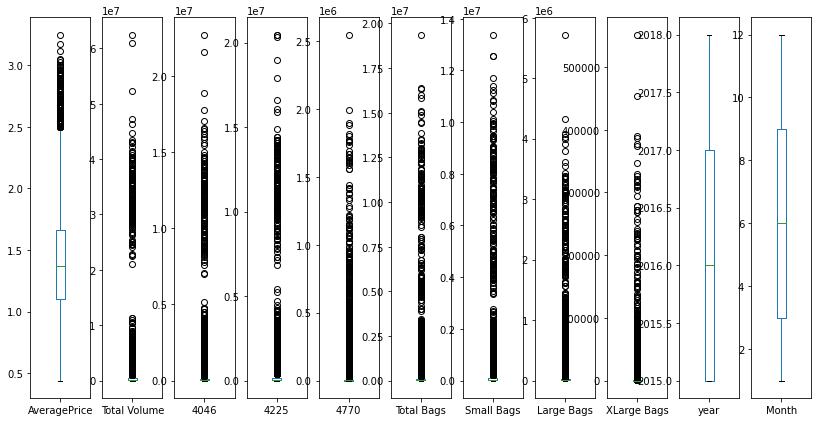

In [41]:
df.plot(kind='box',subplots=True,figsize=(14,7))

TotalVolume,'4046','4225','4770','Totalbags','smallBags','LargeBags','XLarge Bags'contain outliers

# Encoding the DataFrame

As our data consist of categeorical data we convert that into numerical data using OrdinalEncoder

In [42]:

from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1


# Removing Outliers

In [43]:
df1=df.select_dtypes(np.number)

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int32),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int32))

In [45]:
df_new=df1[(z<3).all(axis=1)]

In [46]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11


In [47]:
print("OldDataFrame",df.shape)
print("newdataframe",df_new.shape)
print("Totaldroppedrows",df.shape[0]-df_new.shape[0])


OldDataFrame (18249, 14)
newdataframe (17651, 13)
Totaldroppedrows 598


In [48]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

# seperating the columns into features and target

In [49]:
x=df_new.drop(['AveragePrice'],axis=1)
y=df_new['AveragePrice']

# Transforming data to remove skewness

Here we are using power_transformation to remove skewness

In [50]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [-0.14749743, -0.77717852,  0.26951276, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -1.2106467 ,
        -2.01058988,  1.49138301],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ...,  1.97870686,
         1.57828237, -1.64028838],
       [-0.70179733, -0.54701087, -0.71637127, ...,  1.97870686,
         1.57828237, -1.64028838],
       [-0.66738095, -0.35967077, -0.79165015, ...,  1.97870686,
         1.57828237, -1.64028838]])

In [51]:
pd.DataFrame(x).skew()

0    -0.008642
1    -0.039282
2    -0.044675
3     0.024168
4    -0.022204
5    -0.024405
6    -0.110913
7     0.853758
8    -0.037741
9     0.227731
10   -0.257799
11   -0.146554
dtype: float64

In [52]:
#data is skewed

# Scaling the data Using MinMaxScaler

In [53]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)
x

array([[0.55893336, 0.35498056, 0.57757163, ..., 0.        , 0.        ,
        1.        ],
       [0.54510426, 0.32886287, 0.5614532 , ..., 0.        , 0.        ,
        1.        ],
       [0.61275241, 0.33876453, 0.63618871, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.42481659, 0.36358503, 0.35516323, ..., 1.        , 1.        ,
        0.        ],
       [0.43889538, 0.37905957, 0.36746539, ..., 1.        , 1.        ,
        0.        ],
       [0.44548987, 0.41991611, 0.35265312, ..., 1.        , 1.        ,
        0.        ]])

# Checking VIF

In [54]:
d=df.drop(['Date','region','type','AveragePrice','Total Bags','year'],axis=1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(d)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(d.values,i) for i in range(len(d.columns))]
vif["features"]=pd.DataFrame(d).columns
vif

,vif,features
0,5.202516e+09,Total Volume
1,6.933785e+08,4046
2,6.320930e+08,4225
3,4.963920e+06,4770
4,2.426346e+08,Small Bags
5,2.569115e+07,Large Bags
6,1.326561e+05,XLarge Bags
7,1.044053e+00,Month


# PCA to handle Dimentionality Reduction


In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(d)

In [56]:
from sklearn.decomposition import PCA
pca=PCA()

In [57]:
principal_component=pca.fit_transform(scaled)

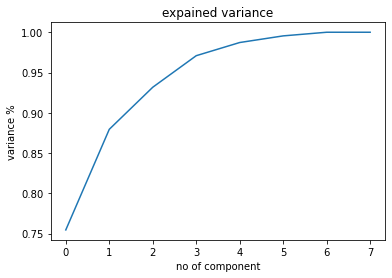

In [58]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance %')
plt.title('expained variance')
plt.show()

In [59]:
#Graph shows 7 components have expained 97% of variance of all features, so use 7

In [60]:
pca=PCA(n_components=7)

In [61]:
new_data=pca.fit_transform(scaled)
principal_x=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.588846,1.640384,-0.024282,0.027043,-0.002335,0.012363,0.008824
1,-0.592764,1.640341,-0.021170,0.026450,-0.000428,0.007458,0.004136
2,-0.564899,1.640649,-0.041095,0.030220,-0.012417,0.042061,0.030248
3,-0.582829,1.640440,-0.029982,0.028711,-0.004733,0.020787,0.018686
4,-0.591536,1.357421,-0.016432,0.024982,-0.000734,0.006962,0.008691
...,...,...,...,...,...,...,...
18244,-0.573847,-1.188610,0.041632,-0.000064,-0.010178,-0.001761,-0.004674
18245,-0.572759,-1.471533,0.045626,-0.000634,-0.010953,-0.000349,0.001385
18246,-0.570842,-1.471619,0.043539,0.004125,-0.007900,-0.001930,-0.001000
18247,-0.569441,-1.471597,0.043491,0.003639,-0.008595,-0.001255,-0.002427


# Model Building

Here our data consist target variable 'AveragePrice' as continuous type so, we use LinearRegression model 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i} the training accaracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state {i} the testing accaracy is:{r2_score(y_test,pred_test)}")
    print("/n")

At random state 1 the training accaracy is:0.5666103521825521
At random state 1 the testing accaracy is:0.5639597075840941
/n
At random state 2 the training accaracy is:0.5718413768134277
At random state 2 the testing accaracy is:0.5427639160840697
/n
At random state 3 the training accaracy is:0.5629430427731699
At random state 3 the testing accaracy is:0.5786904612917028
/n
At random state 4 the training accaracy is:0.5650976909776035
At random state 4 the testing accaracy is:0.5700126247429137
/n
At random state 5 the training accaracy is:0.5626002816407243
At random state 5 the testing accaracy is:0.579344723990582
/n
At random state 6 the training accaracy is:0.5625167397348434
At random state 6 the testing accaracy is:0.5797783923779238
/n
At random state 7 the training accaracy is:0.5639485433044089
At random state 7 the testing accaracy is:0.5742757516621948
/n
At random state 8 the training accaracy is:0.564640199563857
At random state 8 the testing accaracy is:0.57107590399758

At random state 70 the training accaracy is:0.567528469027788
At random state 70 the testing accaracy is:0.5600885810924782
/n
At random state 71 the training accaracy is:0.5641717067770362
At random state 71 the testing accaracy is:0.573457041182919
/n
At random state 72 the training accaracy is:0.5655415098116809
At random state 72 the testing accaracy is:0.5676767729749295
/n
At random state 73 the training accaracy is:0.5660885818032175
At random state 73 the testing accaracy is:0.5658904279009637
/n
At random state 74 the training accaracy is:0.5657763819375096
At random state 74 the testing accaracy is:0.5671425440104048
/n
At random state 75 the training accaracy is:0.5667163281263847
At random state 75 the testing accaracy is:0.5635279187803428
/n
At random state 76 the training accaracy is:0.5645447263428571
At random state 76 the testing accaracy is:0.5723243375038465
/n
At random state 77 the training accaracy is:0.5659180208811989
At random state 77 the testing accaracy is:

At random state 138 the testing accaracy is:0.5665919979689193
/n
At random state 139 the training accaracy is:0.5673456587872778
At random state 139 the testing accaracy is:0.560422117412712
/n
At random state 140 the training accaracy is:0.5639945397345414
At random state 140 the testing accaracy is:0.5743741411537574
/n
At random state 141 the training accaracy is:0.5654938837377796
At random state 141 the testing accaracy is:0.5676233004614633
/n
At random state 142 the training accaracy is:0.5676510743924338
At random state 142 the testing accaracy is:0.5591044618944927
/n
At random state 143 the training accaracy is:0.567282080767392
At random state 143 the testing accaracy is:0.5609987616904474
/n
At random state 144 the training accaracy is:0.5652633164796024
At random state 144 the testing accaracy is:0.5692704037622984
/n
At random state 145 the training accaracy is:0.5660648412056231
At random state 145 the testing accaracy is:0.5659346601575471
/n
At random state 146 the tr

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)


0.5703742683454658

In [66]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor



In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [68]:
def regressor(model,x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=63)
    
    model.fit(x_train,y_train)
    
    pred=model.predict(x_test)
    
    print("MeanSquaredError",mean_squared_error(y_test,pred))
    print("MeanabsoluteError",mean_absolute_error(y_test,pred))
    print("RootMeanSquaredError",np.sqrt(mean_squared_error(y_test,pred)))
    print("r2_score is:",r2_score(y_test,pred))
    print("cross_validation_score is:",cross_val_score(model,x,y,cv=5).mean())

# LinearRegression

In [69]:
model=LinearRegression()
regressor(model,x,y)

MeanSquaredError 0.0656640969140814
MeanabsoluteError 0.20199126057502056
RootMeanSquaredError 0.25625006714941834
r2_score is: 0.5738291232847959
cross_validation_score is: 0.2184305595997794


# Lasso

In [70]:
model=Lasso(alpha=0.001)
regressor(model,x,y)

MeanSquaredError 0.06975244359738399
MeanabsoluteError 0.2086507170103387
RootMeanSquaredError 0.2641068791178753
r2_score is: 0.5472950754227119
cross_validation_score is: 0.15835011040531982


# Ridge

In [71]:
model=Ridge(alpha=0.01)
regressor(model,x,y)

MeanSquaredError 0.06566502451034009
MeanabsoluteError 0.2019936162250212
RootMeanSquaredError 0.2562518770864715
r2_score is: 0.5738231030312725
cross_validation_score is: 0.21841306336026972


# ElasticNet

In [72]:
model=ElasticNet(alpha=0.01)
regressor(model,x,y)

MeanSquaredError 0.08355320864247173
MeanabsoluteError 0.22805948811945734
RootMeanSquaredError 0.28905571892365617
r2_score is: 0.4577258219796735
cross_validation_score is: 0.03041234264976287


# DecisionTreeRegressor

In [73]:
model=DecisionTreeRegressor(random_state=126)
regressor(model,x,y)

MeanSquaredError 0.03793163409798924
MeanabsoluteError 0.1274653072783914
RootMeanSquaredError 0.19476045311610168
r2_score is: 0.7538174052719849
cross_validation_score is: -0.3067854336588017


# RandomForestRegressor

In [74]:
model=RandomForestRegressor()
regressor(model,x,y)

MeanSquaredError 0.017017031163976206
MeanabsoluteError 0.09221478334749363
RootMeanSquaredError 0.1304493432868721
r2_score is: 0.8895566461573235
cross_validation_score is: 0.18740458103062024


# KNN

In [75]:
model=KNeighborsRegressor()
regressor(model,x,y)

MeanSquaredError 0.020785323137921266
MeanabsoluteError 0.10290795808552818
RootMeanSquaredError 0.14417115917520143
r2_score is: 0.8650998064271385
cross_validation_score is: 0.0028157500496400756


# SGDRegressor

In [76]:
model=SGDRegressor()
regressor(model,x,y)

MeanSquaredError 0.0752105024237192
MeanabsoluteError 0.21754441038488367
RootMeanSquaredError 0.27424533254682604
r2_score is: 0.5118713686408156
cross_validation_score is: 0.11612704221313848



# AdaBoostRegressor

In [77]:
model=AdaBoostRegressor()
regressor(model,x,y)

MeanSquaredError 0.06678776487451768
MeanabsoluteError 0.20844533764933978
RootMeanSquaredError 0.25843328902159196
r2_score is: 0.5665363319065408
cross_validation_score is: 0.014140390446135109


# GradientBoostRegressor

In [78]:
model=GradientBoostingRegressor()
regressor(model,x,y)

MeanSquaredError 0.038055171848369734
MeanabsoluteError 0.1482982057787497
RootMeanSquaredError 0.19507734837333046
r2_score is: 0.7530156247882608
cross_validation_score is: 0.3840180721428753


here our residuals looked to be normally distributed which means that our model RandomForestRegressor is best choice for the data

# HyperParameterTuning

In [79]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2_score',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2_score 98.69113823112633
cross val score: 19.0482147949486


In [80]:
df=pd.DataFrame({"Actual":y_test,"Predicted":pred_decision})
df

,Actual,Predicted
3596,1.36,1.3841
7141,1.70,1.6915
4625,1.22,1.2007
5456,0.81,0.8304
10969,1.85,1.8382
...,...,...
14775,1.79,1.8587
2224,1.19,1.2019
10030,2.31,2.3017
5360,1.55,1.5505


# Region Wise Analysis

In [83]:
df=pd.read_csv("Avacado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [84]:
#Encoding categeorical type into Numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dict={}
le.fit(df.type.drop_duplicates())
dict['Type']=list(le.classes_)
df.type=le.transform(df.type)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


<AxesSubplot:>

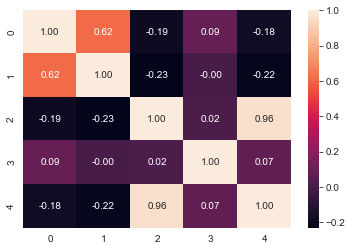

In [85]:
cols=['AveragePrice','type','Total Volume','year','Total Bags']
cm=np.corrcoef(df[cols].values.T)
sns.heatmap(cm,annot=True,fmt='.2f')

we can see There is a strong relation between TotalBags and TotalVolume 0.96 and also type and AveragePrice 0.62,Other than that there is a weak relation

# TotalVolume vs small,Large and Xlarge

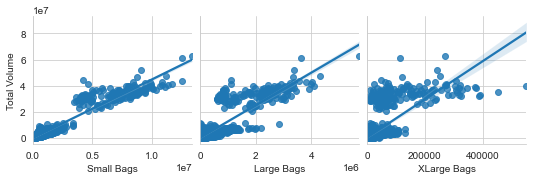

In [86]:
sns.pairplot(df,x_vars=['Small Bags','Large Bags','XLarge Bags'],y_vars='Total Volume',kind='reg')

There is a strong correlation between Total Volume and Small Bags,weak correlation between TotalVolume and XLargeBags

# Region Vs Yearly AveragePrice Distribution

Text(0.5, 1.0, 'Year vs Region')

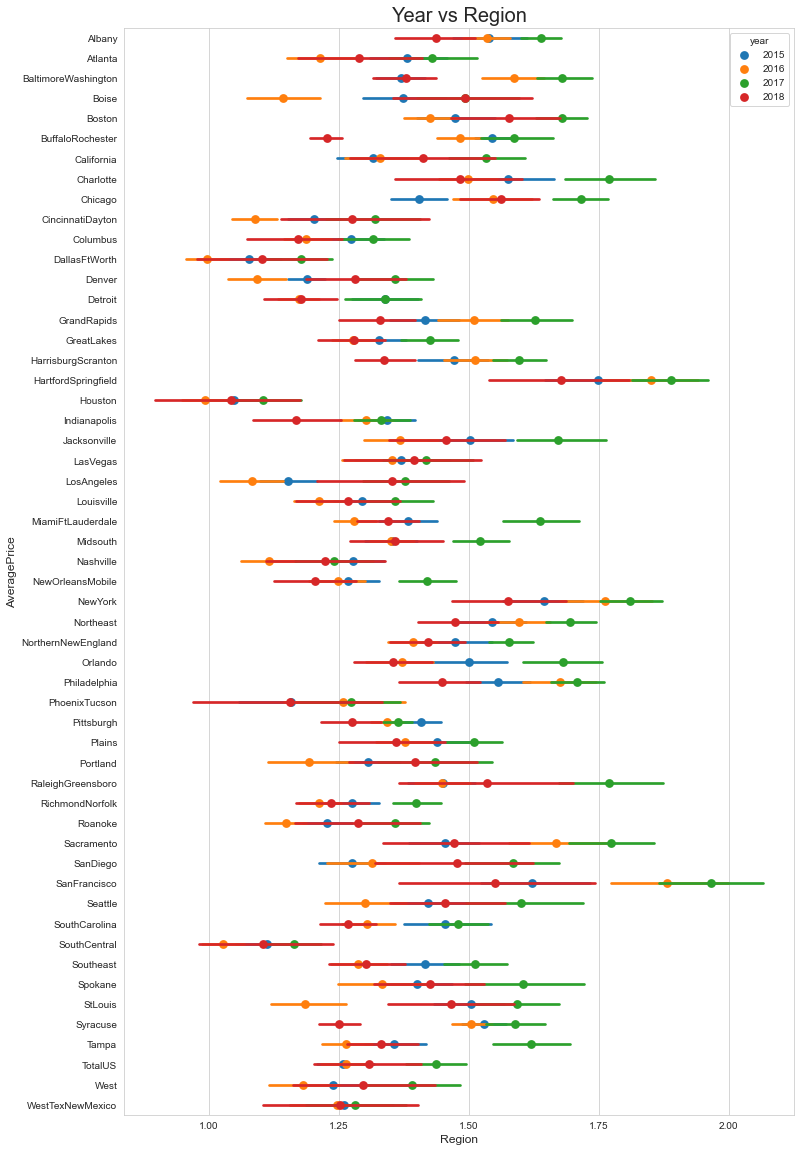

In [87]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df,hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize':'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title('Year vs Region',{'fontsize':20})

from the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avacado

# Region Vs Type of AveragePrice Distribution

Text(0.5, 1.0, 'Type of AveragePrice vs Region')

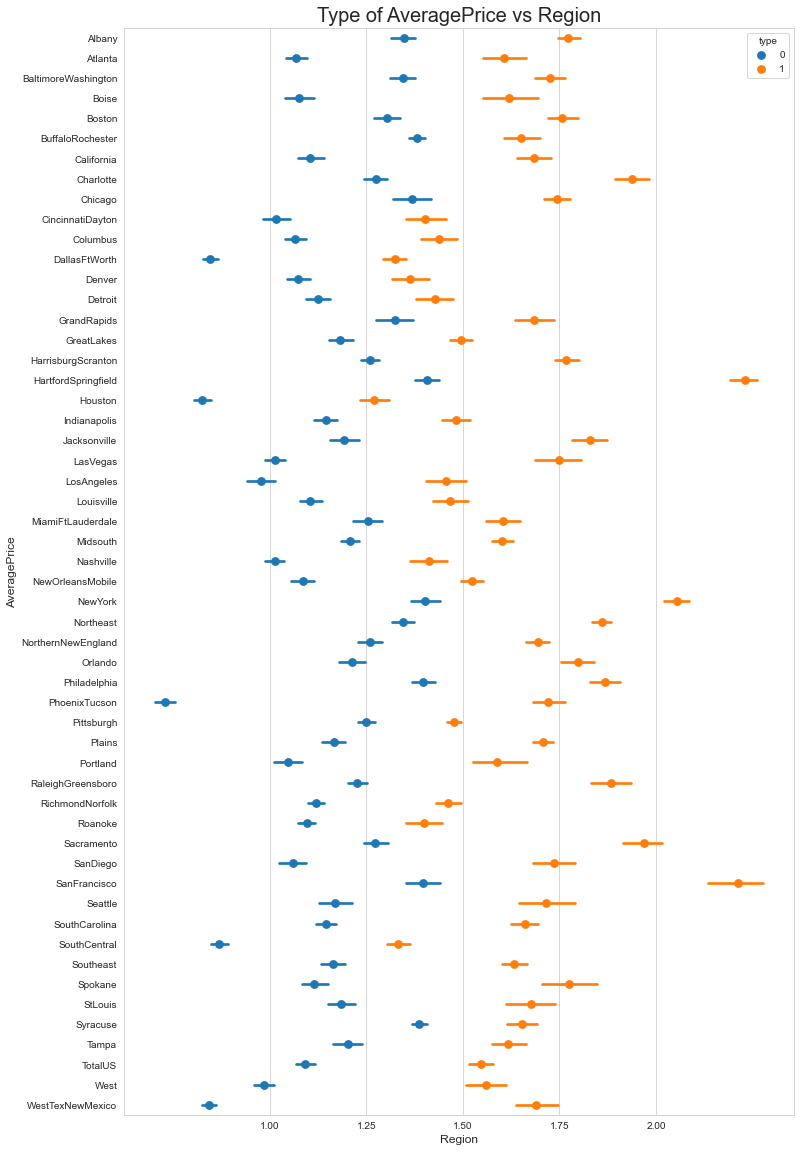

In [88]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df,hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize':'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title('Type of AveragePrice vs Region',{'fontsize':20})

organic type of avacado prices are high in HartfordSpringfield and SanFrancisco region

# Model Building for classification


Splitting the data into features and target

In [89]:
x=df[['AveragePrice','Small Bags','Large Bags','XLarge Bags']]
y=df['type']

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
le=LogisticRegression()
le.fit(x_train,y_train)
pred_train=le.predict(x_train)
pred_test=le.predict(x_test)
print(f"At Random state {i} the training accuracy is:",accuracy_score(y_train,pred_train))
print(f"At Random state {i} the testing accuracy is:",accuracy_score(y_test,pred_test))
print("\n")

At Random state 199 the training accuracy is: 0.8478662922117953
At Random state 199 the testing accuracy is: 0.8558904109589041




# DecisionTreeClassifier

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print("cross_validation_score is:",cross_val_score(dtc,x,y,cv=5).mean())

Accuracy_score is: 0.9312328767123288
[[1719  129]
 [ 122 1680]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1848
           1       0.93      0.93      0.93      1802

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650

cross_validation_score is: 0.8997746051648603


# KNN

In [92]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))
print("cross_val_score is",cross_val_score(knn,x,y,cv=5).mean())

Accuracy is 0.8898630136986302
[[1692  156]
 [ 246 1556]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1848
           1       0.91      0.86      0.89      1802

    accuracy                           0.89      3650
   macro avg       0.89      0.89      0.89      3650
weighted avg       0.89      0.89      0.89      3650

cross_val_score is 0.8549502246815603


# SVC

In [93]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.8753424657534247
[[1593  255]
 [ 200 1602]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1848
           1       0.86      0.89      0.88      1802

    accuracy                           0.88      3650
   macro avg       0.88      0.88      0.88      3650
weighted avg       0.88      0.88      0.88      3650

cross_val_score is: 0.861252810865803


In [94]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy_score is:",accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))
print("cross_val_score is:",cross_val_score(svc,x,y,cv=5).mean())

Accuracy_score is: 0.5989041095890411
[[ 402 1446]
 [  18 1784]]
              precision    recall  f1-score   support

           0       0.96      0.22      0.35      1848
           1       0.55      0.99      0.71      1802

    accuracy                           0.60      3650
   macro avg       0.75      0.60      0.53      3650
weighted avg       0.76      0.60      0.53      3650

cross_val_score is: 0.5969115651876852


# RandomForestClassifier

In [95]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))
print("cross_val_score is",cross_val_score(rfc,x,y,cv=5).mean())

Accuracy is 0.9506849315068493
[[1759   89]
 [  91 1711]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1848
           1       0.95      0.95      0.95      1802

    accuracy                           0.95      3650
   macro avg       0.95      0.95      0.95      3650
weighted avg       0.95      0.95      0.95      3650

cross_val_score is 0.9245976792290627


# GradientBoostingClassifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print("Accuracy is",accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))
print("cross_val_score is",cross_val_score(gbc,x,y,cv=5).mean())

Accuracy is 0.9473972602739726
[[1766   82]
 [ 110 1692]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1848
           1       0.95      0.94      0.95      1802

    accuracy                           0.95      3650
   macro avg       0.95      0.95      0.95      3650
weighted avg       0.95      0.95      0.95      3650

cross_val_score is 0.928323811740503


# Hyper Parameter Tuning

In [97]:
rf=RandomForestClassifier(max_features=3,bootstrap=False)
rf.fit(x,y)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=accuracy_score(y_test,pred_decision)
print('accuracyscore',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)


accuracyscore 100.0
cross val score: 91.23774950540025


# AUC ROC curve

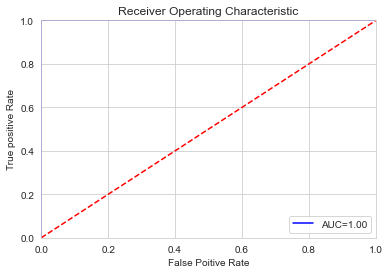

In [99]:
#AUC ROC curve
from sklearn import metrics
probs=rf.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Poitive Rate')
plt.show()

# Testing the Model

In [100]:
df=pd.DataFrame({"Actual":y_test,"Predicted":predrfc})
df

,Actual,Predicted
14192,1,1
1873,0,0
7293,0,0
15087,1,1
9888,1,1
...,...,...
4471,0,0
12556,1,1
9063,0,1
7497,0,0


Conclusion: Here RandomForestRegressor is giving the r2_score of 97%
and RandomForestClassifier as the accuracyscore as 100% and cross_val_score as 91%. so,we accept this model

# Saving the model

In [101]:
import pickle
filename="Avacado_AveragePrice_Prediction.pkl"
pickle.dump(rfc,open(filename,'wb'))